# Homework 9
## ECE 204 Data Science & Engineering

In [18]:
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.ar_model import AutoReg
import warnings
warnings.filterwarnings("ignore")

# Add other import statements you need here
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


---
**Problem 1.** Read in `australia-rosslyn-bay.csv`.

**What is the mean air temperature for all measurements made between 2 pm and 6 pm (Both inclusive)?**

*Note:* in 24-hour time (which is what this dataset uses, 2pm is hour 14 and 6pm is hour 18).

In [8]:
# given code
df = pd.read_csv("australia_rosslyn_bay.csv", parse_dates=True, index_col=0)
df.head()

# your code here

# Filter the DataFrame for the hours between 14 and 18 (2 pm to 6 pm)
afternoon_temps = df.between_time('14:00', '18:00')

# Calculate the mean air temperature
mean_temp = afternoon_temps['air_temp'].mean()

print(mean_temp)


21.59373263605164


---
**Problem 2.** Read in `australia-rosslyn-bay.csv`. **What is the mean air temperature for all measurements made in October?**

In [9]:
# given code
df = pd.read_csv("australia_rosslyn_bay.csv", parse_dates=True, index_col=0)

# your code here
oct_temps = df[df.index.month == 10]
oct_mean_temp = oct_temps['air_temp'].mean()
oct_mean_temp

23.13707997641973

---
**Problem 3.** Read in `australia-rosslyn-bay.csv`. **What month has the lowest average pressure?** Report the answer as a number (e.g., "3" for "March").

In [13]:
df = pd.read_csv("australia_rosslyn_bay.csv", parse_dates=True, index_col=0)

# your code here
df.head()
df['month'] = df.index.month
avg_pressure_month = df.groupby('month')['pressure'].mean()
lowest_pressure_month = avg_pressure_month.idxmin()
lowest_pressure_month

,sea_level,water_temp,air_temp,pressure,wind_dir,wind_gust,wind_speed
datetime,,,,,,,
1997-03-26 02:00:00,1.179638,24.4,24.3,1014.8,270.0,17.9,0.0
1997-03-26 03:00:00,0.387638,24.5,24.0,1014.3,359.0,0.0,0.0
1997-03-26 04:00:00,-0.485362,24.7,22.4,1013.7,193.0,5.2,0.3
1997-03-26 06:00:00,-1.478362,24.7,22.7,1013.8,162.0,11.0,3.4
1997-03-26 07:00:00,-1.330362,24.7,22.0,1014.4,173.0,10.2,4.0


---
**Problem 4.** Read in australia-rosslyn-bay.csv. **What is the 95th percentile (or quantile) of the air pressure during August?**

*Hint:* https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.quantile.html

In [15]:
df = pd.read_csv("australia_rosslyn_bay.csv", parse_dates=True, index_col=0)

# your code here
august_pressure = df[df.index.month == 8]['pressure']
percentile_95_august = august_pressure.quantile(0.95)
percentile_95_august

1024.0

---

The following questions are based on a synthetic dataset "share-prices.csv" that capture daily mean share prices ((opening + closing)/ 2) of a company from 1st January, 2000 to 2nd May, 2000. This amount to 123 mean share price observations.

The next two questions will pretend you're a stock market analyst on May 2nd, 2000 and are developing a new method of finding future stock prices. You're using all days up to and including April 19th, 2000 as train data, and trying to predict stock prices on April 20th, 2000 and beyond.

Let's pretend we're developing a new technique to predict future performance. This means that there is a natural division between the train and test sets:

- **Train set:** January 1st, 2000 (2000-01-01) to 19th April, 2000 (2000-04-19), or 110 days.
- **Test set:** April 20th, 2000 (2000-04-20) to the end, 2nd May, 2000 (2000-05-02), or 13 days.

The next two questions use the library `statsmodels`, and only for the "auto-regressive" model or AR model. Auto-regression is linear regression on the last `maxlag` values of a time series (and below the statsmodel package is only used to help with predicting more than one new value).

`statsmodels` differs from Scikit-Learn in a couple ways:

* In statsmodels, the data is passed to during model creation (not during model fitting like Scikit-Learn).
* In statsmodels, the hyper-parameters are passed to during model fitting (not during model creation like Scikit-Learn).

Notably, predicting new values only needs the train dataset: the prediction works recursively starting from the last value in the train dataset.

---
**Problem 5.** Read in `share-prices.csv`. Train an auto-regressive model with the previous 4 weeks of data, or `lags=28`; that is, predict today's stock price given the last 28 days.

Use the historical data (or train set) to fit the model. Predict stock price from April, 20th 2000 to May 2nd, 2000. This will happen recursively using statsmodels – the statsmodel auto-regressive model will generate a prediction for April 20th, then use that value to predict April 21st and so on.

**What is the mean squared error between the predicted and true values from April 20th to May 2nd 2000?**

*Gold star question:* Would you use this model for actually making decisions on stock transactions? It'd be useful to plot and visualize both the predicted and true values for the testing time-period. 

In [16]:
df = pd.read_csv("share_prices.csv", parse_dates=True, index_col=0)
df.index.freq = "D"  # set as "daily" frequency; observations are recorded every day. Removes a warning in statsmodels

# Training and testing set
df_train = df.loc[:'2000-04-19']
df_test = df.loc['2000-04-20':]
df_train.tail()

,price
date,
2000-04-15,57.24
2000-04-16,42.70
2000-04-17,51.28
2000-04-18,58.82
2000-04-19,64.79


In [17]:

# Training the Auto-regressive model with lags=28
model = AutoReg(df_train, lags=28)
model_fitted = model.fit()

# Predicting stock price from April 20th to May 2nd, 2000
start = len(df_train)
end = len(df) - 1  # last index of the dataset
predictions = model_fitted.predict(start=start, end=end, dynamic=False)

# Calculating the Mean Squared Error between the predicted and true values
mse = mean_squared_error(df_test, predictions)
print(mse)


1189.4080021802927


---
**Problem 6.** In this question, **use auto-regression model to find the best value of `lags` from 1 to 10 both inclusive**. Here **best** is defined to be **"minimum mean squared error on the validation set"**. The dataset has been split as follows:

- Training set: January 1st, 2000 to April 1st, 2000
- Validation set: from April 2nd, 2000 to May 2nd, 2000.

The validation set has 31 observations, which provides a more fair assessment of different values of `maxlag`; there are at least 20 predictions that are solely created by the model and don't use any "free" historical data.

*Gold star question: Plot the predictions for the best `lags`. Would you use this model to buy stocks?*

In [19]:
df = pd.read_csv("share_prices.csv", parse_dates=True, index_col=0)
df.index.freq = "D"  # set as "daily" frequency; observations are recorded every day. Removes a warning in statsmodels

# Training and validation set
df_train = df.loc[:'2000-04-01']
df_val = df.loc['2000-04-02':]

The best lag is: 6 with an MSE of 806.5127820259532


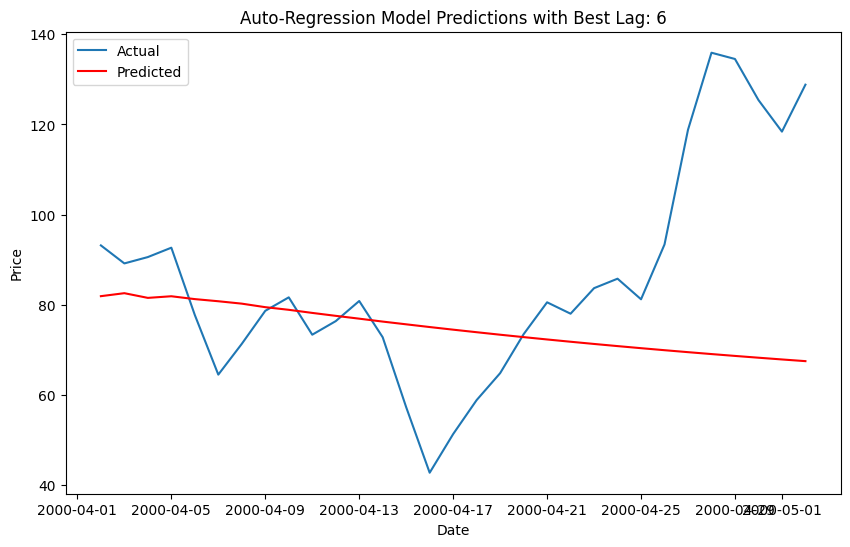

In [20]:
# your code here
# Finding the best value of lags (1 to 10) based on minimum MSE
best_mse = float('inf')
best_lag = None
predictions_best = None

for lag in range(1, 11):
    model = AutoReg(df_train, lags=lag)
    model_fitted = model.fit()
    start = len(df_train)
    end = len(df_train) + len(df_val) - 1
    predictions = model_fitted.predict(start=start, end=end, dynamic=False)
    mse = mean_squared_error(df_val, predictions)
    if mse < best_mse:
        best_mse = mse
        best_lag = lag
        predictions_best = predictions

# Print the best lag
print(f"The best lag is: {best_lag} with an MSE of {best_mse}")

# Plotting the predictions for the best lags
plt.figure(figsize=(10, 6))
plt.plot(df_val.index, df_val, label='Actual')
plt.plot(df_val.index, predictions_best, label='Predicted', color='red')
plt.title(f"Auto-Regression Model Predictions with Best Lag: {best_lag}")
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()
plt.show()

